In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score



In [9]:
# Read the 'merged_df_train_4.pkl' pickle file and load it into the 'train' DataFrame
merged_df_train = pd.read_pickle('merged_df_train_lgbm.pkl')
df_train = pd.DataFrame(merged_df_train)

# Read the 'test_3.pkl' pickle file and load it into the 'test' DataFrame
merged_df_test = pd.read_pickle('merged_df_test_lgbm.pkl')
df_test = pd.DataFrame(merged_df_test)

In [10]:
merged_df_train

,card1,TransactionAmt,card2_target_encoded,addr_target_encoded,addr1_target_encoded,dist1,D15,id_02,TransactionAmt_decimal,C1,...,V37,V20,V5,V44,V285,V77,V56,isFraud,isFraud_lgbm,isFraud_lgbm_proba
TransactionID,,,,,,,,,,,,,,,,,,,,,
2987000,13926,68.500,NaN,0.018030,0.018029,19.0,0.0,NaN,500,1.0,...,NaN,1.0,1.0,NaN,0.0,1.0,1.0,0,0,0.099155
2987001,2755,29.000,0.072853,0.024638,0.024637,NaN,0.0,NaN,0,1.0,...,1.0,1.0,NaN,1.0,0.0,1.0,1.0,0,0,0.090482
2987002,4663,59.000,0.023747,0.030797,0.030792,287.0,315.0,NaN,0,1.0,...,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0,0,0.059829
2987003,18132,50.000,0.015023,0.036640,0.036630,NaN,111.0,NaN,0,2.0,...,1.0,1.0,NaN,1.0,10.0,1.0,1.0,0,0,0.014938
2987004,4497,50.000,0.047572,0.033321,0.033321,NaN,NaN,70787.0,0,1.0,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,0,0.050098
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3429900,7508,107.950,0.028380,0.032233,0.032233,10.0,348.0,NaN,950,3.0,...,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0,0,0.018850
3429901,15885,35.658,0.081291,NaN,NaN,NaN,NaN,275527.0,658,1.0,...,NaN,NaN,NaN,NaN,0.0,NaN,1.0,0,0,0.059053
3429902,9992,30.950,0.013495,0.025818,0.025773,4.0,138.0,NaN,949,83.0,...,NaN,1.0,1.0,NaN,5.0,1.0,1.0,0,0,0.005292


In [11]:
merged_df_test

,V264,addr2_target_encoded,V283,C1,C5,R_emaildomain_bin_google,M4_nan,V30,V156,D3,...,card6_debit,V142,V47,V80,TransactionAmt_decimal,P_emaildomain_suffix_us,D15,isFraud,isFraud_lgbm,isFraud_lgbm_proba
TransactionID,,,,,,,,,,,,,,,,,,,,,
3429905,NaN,0.024207,1.0,1.0,1.0,0,1,0.0,NaN,NaN,...,1,NaN,NaN,NaN,949,0,NaN,0,0,0.026813
3429906,NaN,0.024207,0.0,2.0,1.0,0,1,1.0,NaN,362.0,...,1,NaN,NaN,NaN,950,1,NaN,0,0,0.008083
3429907,NaN,0.024207,0.0,161.0,95.0,0,0,1.0,NaN,15.0,...,1,NaN,1.0,0.0,0,0,559.0,0,0,0.037639
3429908,NaN,0.024207,0.0,3.0,0.0,0,0,0.0,NaN,0.0,...,1,NaN,1.0,0.0,0,0,163.0,0,0,0.007772
3429909,0.0,0.024207,1.0,2.0,0.0,1,1,NaN,1.0,NaN,...,0,0.0,1.0,1.0,0,0,57.0,0,0,0.048690
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3577535,NaN,0.024207,1.0,2.0,1.0,0,0,1.0,NaN,30.0,...,1,NaN,NaN,0.0,0,0,56.0,0,0,0.039118
3577536,NaN,0.024207,1.0,1.0,0.0,0,0,0.0,NaN,NaN,...,1,NaN,1.0,0.0,500,0,0.0,0,0,0.060929
3577537,NaN,0.024207,1.0,1.0,1.0,0,1,1.0,NaN,NaN,...,1,NaN,1.0,0.0,949,0,0.0,0,0,0.014945


[[423759   3583]
 [  5096  10467]]


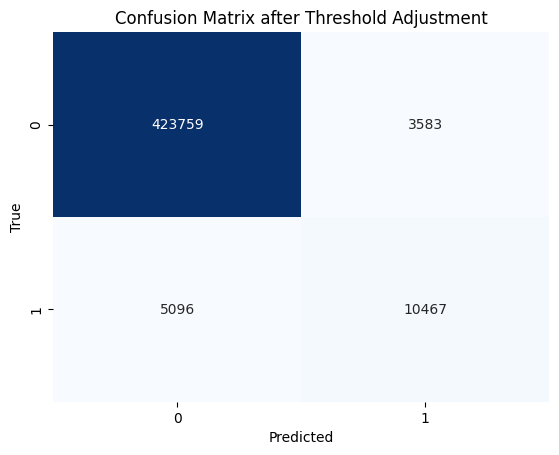

In [12]:
# Compare the predicted labels from a model with the true labels
# Parameter true values and predicted values
confusion = confusion_matrix(df_train['isFraud'], df_train['isFraud_lgbm'])
print(confusion)
# Confusion Matrix
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix after Threshold Adjustment')
plt.show()


TRAIN

Threshold: 0, TPR: 1.0, FPR: 1.0
Threshold: 0.1, TPR: 0.9485317740795477, FPR: 0.18894936608149912
Threshold: 0.2, TPR: 0.8696266786609266, FPR: 0.06880905691460236
Threshold: 0.3, TPR: 0.8026087515260554, FPR: 0.03168422481291331
Threshold: 0.4, TPR: 0.7365546488466234, FPR: 0.016115897805504726
Threshold: 0.5, TPR: 0.6725567050054617, FPR: 0.008384385340078907
Threshold: 0.6, TPR: 0.60142646019405, FPR: 0.004336105508000618
Threshold: 0.7, TPR: 0.5256698579965302, FPR: 0.0022721848074844036
Threshold: 0.8, TPR: 0.43751204780569297, FPR: 0.001132582334523637
Threshold: 0.9, TPR: 0.3174837756216668, FPR: 0.0004305684908106388


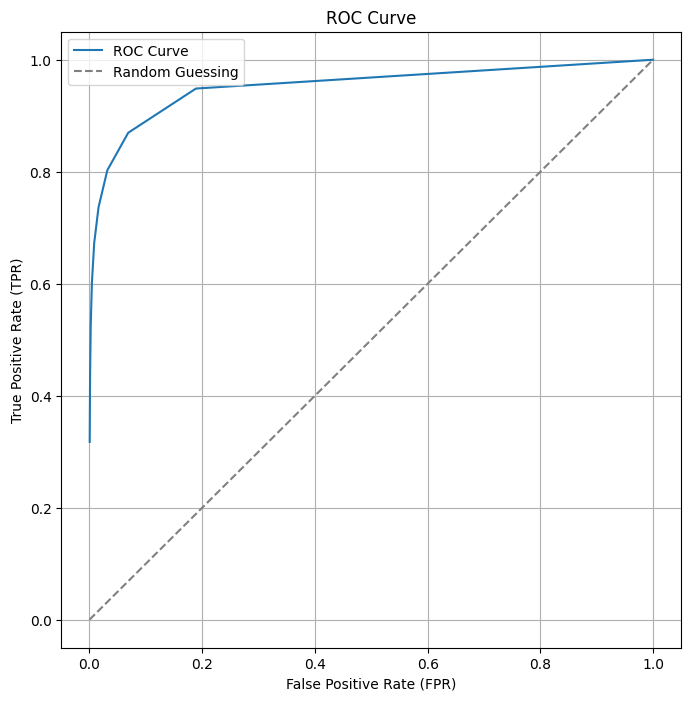

In [15]:
conf_matrix = np.array(confusion)

# Thresholds
thresholds = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

# Initialize lists to store TPR and FPR for each threshold
tpr_list = []
fpr_list = []

for threshold in thresholds:
    # You would replace this part with your actual model predictions
    predicted_positive = (df_train['isFraud_lgbm_proba'] >= threshold).astype(int)

    # Confusion matrix for the current threshold
    conf_matrix_threshold = confusion_matrix(df_train['isFraud'], predicted_positive)

    # Calculate True Positive Rate and False Positive Rate for the current threshold
    TPR = conf_matrix_threshold[1, 1] / (conf_matrix_threshold[1, 1] + conf_matrix_threshold[1, 0])
    FPR = conf_matrix_threshold[0, 1] / (conf_matrix_threshold[0, 0] + conf_matrix_threshold[0, 1])

    # Append TPR and FPR to the lists
    tpr_list.append(TPR)
    fpr_list.append(FPR)

# Print the results
for i, threshold in enumerate(thresholds):
    print(f"Threshold: {threshold}, TPR: {tpr_list[i]}, FPR: {fpr_list[i]}")

# Plot TPR vs. FPR
tpr_list = np.array(tpr_list)
fpr_list = np.array(fpr_list)

optimal_threshold_index = np.argmax(tpr_list - fpr_list)
optimal_threshold = thresholds[optimal_threshold_index]

# Plot TPR vs. FPR
plt.figure(figsize=(8, 8))
plt.plot(fpr_list, tpr_list, label='ROC Curve')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guessing')

# Labeling and customization
plt.title('ROC Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend()
plt.grid(True)
plt.show()




Find the index of the threshold where the ROC curve is closest to the upper left corner (0, 1), 
which is considered an optimal point for a binary classification model. 

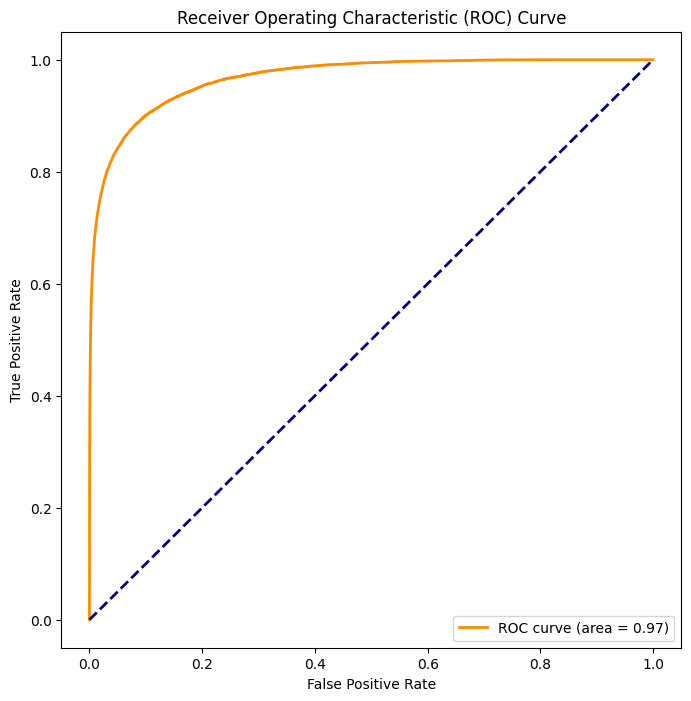

optimal_threshold_index:  9785
Optimal Threshold: 0.18090203485274864
AUC Score: 0.9015

              precision    recall  f1-score   support

           0       1.00      0.92      0.96    427342
           1       0.28      0.88      0.43     15563

    accuracy                           0.92    442905
   macro avg       0.64      0.90      0.69    442905
weighted avg       0.97      0.92      0.94    442905

[[0.91895016 0.08104984]
 [0.11604446 0.88395554]]
[[392706  34636]
 [  1806  13757]]


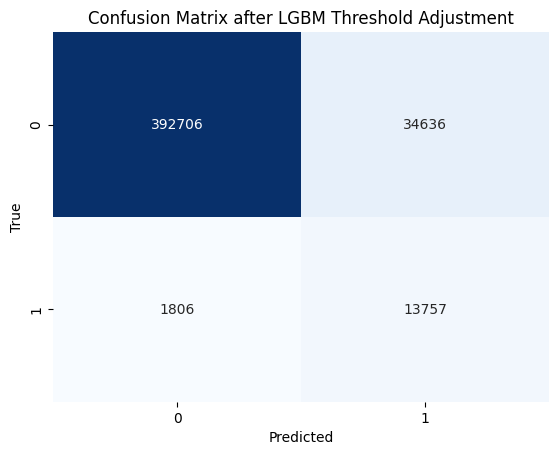

In [18]:
# 'isFraud' is the column with actual labels
# 'isFraud_lgbm_proba' is the column with predicted probabilities

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(df_train['isFraud'], df_train['isFraud_lgbm_proba'])

# Calculate AUC-ROC
roc_auc = roc_auc_score(df_train['isFraud'], df_train['isFraud_lgbm_proba'])

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Find the optimal threshold
# np.argmax() -  returns the index of the maximum value in an array
# find the index of the threshold where the ROC curve is closest to the upper left corner (0, 1), which is considered an optimal point for a binary classification model. 
optimal_threshold_index = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_threshold_index]
print("optimal_threshold_index: ", optimal_threshold_index)
# This threshold is chosen as the optimal threshold for making predictions based on the ROC curve analysis
print('Optimal Threshold:', optimal_threshold)

df_train['isFraud_lgbm_adjusted'] = (df_train['isFraud_lgbm_proba'] >= optimal_threshold).astype(int)

# Calculate AUC directly using roc_auc_score
auc_score = roc_auc_score(df_train['isFraud'], df_train['isFraud_lgbm_adjusted'])
print(f'AUC Score: {auc_score:.4f}')
print()
#classification report
print(classification_report(df_train['isFraud'], df_train['isFraud_lgbm_adjusted']))

#confusion matrix
print(confusion_matrix(df_train['isFraud'], df_train['isFraud_lgbm_adjusted'], normalize='true'))

confusion = confusion_matrix(df_train['isFraud'], df_train['isFraud_lgbm_adjusted'])
print(confusion)
# Confusion Matrix
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix after LGBM Threshold Adjustment')
plt.show()


In [19]:
df_train

,card1,TransactionAmt,card2_target_encoded,addr_target_encoded,addr1_target_encoded,dist1,D15,id_02,TransactionAmt_decimal,C1,...,V20,V5,V44,V285,V77,V56,isFraud,isFraud_lgbm,isFraud_lgbm_proba,isFraud_lgbm_adjusted
TransactionID,,,,,,,,,,,,,,,,,,,,,
2987000,13926,68.500,NaN,0.018030,0.018029,19.0,0.0,NaN,500,1.0,...,1.0,1.0,NaN,0.0,1.0,1.0,0,0,0.099155,0
2987001,2755,29.000,0.072853,0.024638,0.024637,NaN,0.0,NaN,0,1.0,...,1.0,NaN,1.0,0.0,1.0,1.0,0,0,0.090482,0
2987002,4663,59.000,0.023747,0.030797,0.030792,287.0,315.0,NaN,0,1.0,...,1.0,1.0,1.0,0.0,1.0,1.0,0,0,0.059829,0
2987003,18132,50.000,0.015023,0.036640,0.036630,NaN,111.0,NaN,0,2.0,...,1.0,NaN,1.0,10.0,1.0,1.0,0,0,0.014938,0
2987004,4497,50.000,0.047572,0.033321,0.033321,NaN,NaN,70787.0,0,1.0,...,NaN,NaN,NaN,0.0,NaN,NaN,0,0,0.050098,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3429900,7508,107.950,0.028380,0.032233,0.032233,10.0,348.0,NaN,950,3.0,...,1.0,1.0,1.0,0.0,1.0,1.0,0,0,0.018850,0
3429901,15885,35.658,0.081291,NaN,NaN,NaN,NaN,275527.0,658,1.0,...,NaN,NaN,NaN,0.0,NaN,1.0,0,0,0.059053,0
3429902,9992,30.950,0.013495,0.025818,0.025773,4.0,138.0,NaN,949,83.0,...,1.0,1.0,NaN,5.0,1.0,1.0,0,0,0.005292,0


#TEST

In [22]:
# 'isFraud_lgbm' is the column with original binary predictions
# 'isFraud_lgbm_proba' is the column with predicted probabilities

# Adjust the classification threshold
adjusted_threshold = 0.18
df_test['isFraud_lgbm_adjusted'] = (df_test['isFraud_lgbm_proba'] >= adjusted_threshold).astype(int)


print("Threshold: ", adjusted_threshold)
# Calculate AUC directly using roc_auc_score
auc_score = roc_auc_score(df_test['isFraud'], df_test['isFraud_lgbm_adjusted'])
print(f'AUC Score: {auc_score:.4f}')
print()
#classification report
print(classification_report(df_test['isFraud'], df_test['isFraud_lgbm_adjusted']))

#confusion matrix
print(confusion_matrix(df_test['isFraud'], df_test['isFraud_lgbm_adjusted'], normalize='true'))


Threshold:  0.18
AUC Score: 0.8026

              precision    recall  f1-score   support

           0       0.99      0.92      0.95    142535
           1       0.23      0.69      0.35      5100

    accuracy                           0.91    147635
   macro avg       0.61      0.80      0.65    147635
weighted avg       0.96      0.91      0.93    147635

[[0.91919879 0.08080121]
 [0.31392157 0.68607843]]
